# Assignment 1

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Define functions

In [2]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

### <span style="color:chocolate">Exercise 1:</span> Create data (10 points)

Create artificial data using the function <span style="color:chocolate">create_1d_data()</span> defined at the top of this notebook. Set the following argument values:
- number of examples = 70;
- slope (w) = 2;
- intercept (b) = 1;
- bound = 1.

Denote the output by X and Y. Print the shape and the first 10 elements for each object.

In [3]:
# YOUR CODE HERE
# Create the data using the function above:
dat = create_1d_data(num_examples=70, w=2, b=1, bound=1)

# Define the X and Y outputs:
dat_x = dat[0]
dat_y = dat[1]

# Print the first 10 elements and shape of X and Y:
print('The first 10 elements of X:\n', dat_x[:10])
print('The shape of X is:\n', dat_x.shape)
print('The first 10 elements of Y:\n', dat_y[:10])
print('The shape of Y is:\n', dat_y.shape)

The first 10 elements of X:
 [0 1 2 3 4 5 6 7 8 9]
The shape of X is:
 (70,)
The first 10 elements of Y:
 [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]
The shape of Y is:
 (70,)


---
### Step 2: Data preprocessing

Given the simplicity of the data (just one feature in X), our sole task here is to divide the data into training and test sets.

### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.3 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [4]:
# YOUR CODE HERE
# 1)
# Split the X and Y datasets using the train_test_split method:
X_train, X_test = train_test_split(dat_x, test_size=0.3, random_state=1234)
Y_train, Y_test = train_test_split(dat_y, test_size=0.3, random_state=1234)

# 2)
# Print the shape of each array:
print('The shape of X_train:\n', X_train.shape)
print('The shape of X_test:\n', X_test.shape)
print('The shape of Y_train:\n', Y_train.shape)
print('The shape of Y_test:\n', Y_test.shape)

The shape of X_train:
 (49,)
The shape of X_test:
 (21,)
The shape of Y_train:
 (49,)
The shape of Y_test:
 (21,)


---
### Step 3: Exploratory data analysis (EDA)

EDA helps us to gain insights into the distribution and characteristics of the dataset we are dealing with.
This understanding is fundamental for making informed decisions regarding:
- data cleaning;
- feature selection;
- model building;
- model evaluation, etc.

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

1. Generate a scatter plot displaying the X_train data along the x-axis and the Y_train data along the y-axis, ensuring clear labeling of both axes. Add a title "Exploratory Data Analysis: Training Data" and a legend "observed training data" to the plot;
2. Enhance the plot by incorporating a vertical red line to denote the mean value of X_train. Accompany it with a legend clarifying the meaning of the line and the mean value of X_train.

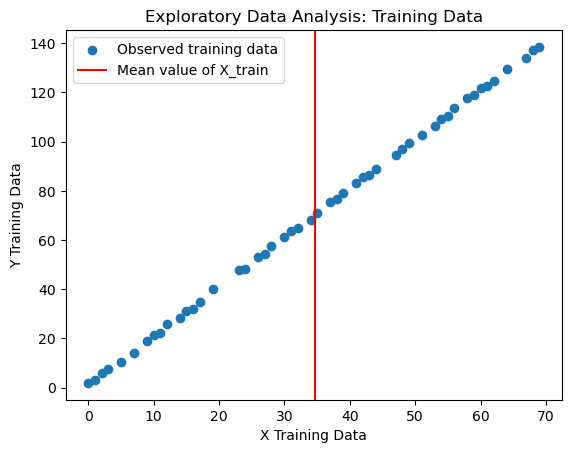

In [5]:
# YOUR CODE HERE
# 1)
# Use the Scatter function in Matplotlib to create the scatter plot:
plt.scatter(x=X_train, y=Y_train, label='Observed training data')

# Label the X and Y axes:
plt.xlabel('X Training Data')
plt.ylabel('Y Training Data')

# Add a title:
plt.title('Exploratory Data Analysis: Training Data')

# 2)
# Find the mean value of X_train:
X_train_mean = np.mean(X_train)

# Add a vertical red line at the mean of X_train:
plt.axvline(x = X_train_mean, color='r', label='Mean value of X_train')
plt.legend();

---
### Step 4: Modeling

In this section, our objective is to propose models to describe the data generation process. Remember a model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = 5+x$
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Models for data (10 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_train. These predictions should be vectors of the same shape as Y_train. Call these predictions M1_hat_train and M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
2. Plot the prediction lines of these two models overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend.

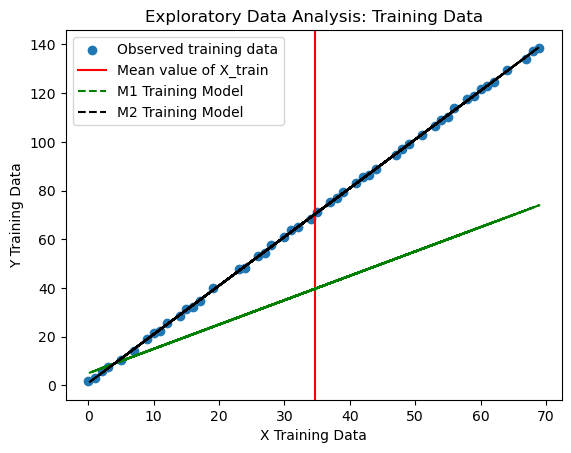

In [6]:
# YOUR CODE HERE
# 1)
# Create the new M1 and M2 prediction vectors using the M1 and M2 functions as
# provided above:
M1_hat_train = 5 + X_train
M2_hat_train = 1 + (2 * X_train)

# 2)
# Plot the prediction lines of these two models overlayed on the plot from
# Question 3 above:

# Use the Scatter function in Matplotlib to create the scatter plot:
plt.scatter(x=X_train, y=Y_train, label='Observed training data')

# Label the X and Y axes:
plt.xlabel('X Training Data')
plt.ylabel('Y Training Data')

# Add a title:
plt.title('Exploratory Data Analysis: Training Data')

# Find the mean value of X_train:
X_train_mean = np.mean(X_train)

# Add a vertical red line at the mean of X_train:
plt.axvline(x = X_train_mean, color='r', label='Mean value of X_train')
plt.legend()

# Add in the new models to the data:
plt.plot(X_train, M1_hat_train, color='green', linestyle='dashed', label='M1 Training Model')
plt.plot(X_train, M2_hat_train, color='black', linestyle='dashed', label='M2 Training Model')
plt.legend();

---
### Step 5: Evaluation and Generalization

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{n} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

How well do our models generalize? The test dataset serves as a proxy for unseen data in real-world applications. By evaluating the model on the test data, you can assess its ability to generalize beyond the training data. This ensures that the model can make accurate predictions on new data it hasn't seen during training.

### <span style="color:chocolate">Exercise 5:</span> Computing MSE (20 points)

1. Write a function for computing the MSE metric based on the provided definition;
2. Utilizing this function, calculate the training data MSE for the two models, $M_1$ and $M_2$.
3. Comment on which model fits the training data better.

In [7]:
# YOUR CODE HERE
# 1)
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  n = len(true_values)
  error = (true_values - predicted_values)**2
  sum_error = np.sum(error)
  loss = (1/n) * sum_error

  return loss

In [8]:
# YOUR CODE HERE
# 2) Calculate the training data MSE for the two models, M1 and M2:
M1_mse = MSE(true_values=Y_train, predicted_values=M1_hat_train)
M2_mse = MSE(true_values=Y_train, predicted_values=M2_hat_train)

# Print the results:
print('Mean Squared Error of M1 = ', M1_mse)
print('Mean Squared Error of M2 = ', M2_mse)

# 3) The M2 model seems to fit the data better, as it has a lower MSE than M1.

Mean Squared Error of M1 =  1358.251515257032
Mean Squared Error of M2 =  0.3135684520465289


### <span style="color:chocolate">Exercise 6:</span> Generalization (15 points)

1. Compute the predictions of models $M_1$ and $M_2$ for the values in X_test. These predictions should be vectors of the same shape as Y_test. Call these predictions M1_hat_test and M2_hat_test.
2. Calculate the test data MSE for the two models, $M_1$ and $M_2$, using the <span style="color:chocolate">MSE()</span> function defined above.
3. Does the model you chose in Exercise 5 generalize well?

In [9]:
# YOUR CODE HERE
# 1) Compute the predictions of models M1 and M2 for the values in X_test:
M1_hat_test = 5 + X_test
M2_hat_test = 1 + (2 * X_test)

# 2) Calculate the test data MSE for the two models, M1_hat and M2_hat:
M1_hat_mse = MSE(true_values=Y_test, predicted_values=M1_hat_test)
M2_hat_mse = MSE(true_values=Y_test, predicted_values=M2_hat_test)

# Print the results:
print('Mean Squared Error of M1 = ', M1_hat_mse)
print('Mean Squared Error of M2 = ', M2_hat_mse)

# 3) Yes, you can see that the M2 model generalizes well as it results in a
# MSE of 0.33, which is only slightly higher than the MSE generated by the
# training data.

Mean Squared Error of M1 =  1300.1040149275498
Mean Squared Error of M2 =  0.3370228107719305


### <span style="color:chocolate">Exercise 7:</span> More features (25 points)

1. Fit an 8-th degree polynomial to (X_train, Y_train). Call the predictions of this model M3_hat_train. Hint: see <span style="color:chocolate">np.polyfit()</span> for details.
2. Plot the prediction lines of the $M_3$ overlayed on the observed data (X_train, Y_train). Note: you will generate only one plot. Make sure to include axes names, titles and legend.
3. Calculate the training data MSE for the $M_3$ model using the <span style="color:chocolate">MSE()</span> function defined above.
4. Does model $M_3$ do better than your chosen model in Exercise 5 at predicting the labels for new unseen data? Hint: your new unseen data is the test dataset.

The MSE for M3_hat_train is:  0.2658896411745836
The MSE for M3_hat_test is:  0.3968261065068669


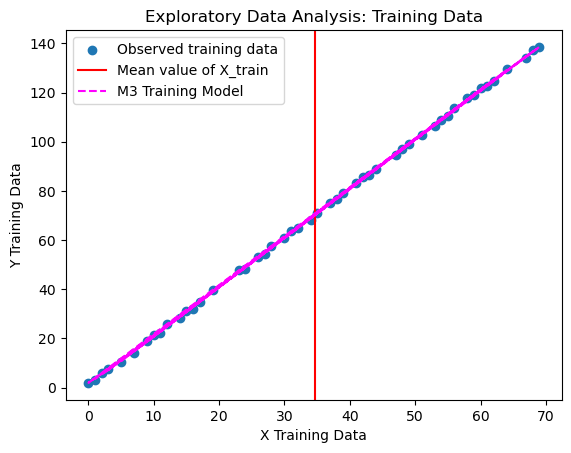

In [10]:
# YOUR CODE HERE
# 1)
# Fit an 8-th degree polynomial to X_train, Y_train by first using polyfit to
# obtain the coefficients of the polynomial:
coefficients = np.polyfit(X_train, Y_train, 8)

# Create a polynomial function from the coefficients:
polynomial = np.poly1d(coefficients)

# Use the polynomial function to generate predicted values for M3_hat_train:
M3_hat_train = polynomial(X_train)

# 2)
# Plot the prediction lines of the new model overlayed on the plot of X_train
# and Y_train:

# Use the Scatter function in Matplotlib to create the scatter plot:
plt.scatter(x=X_train, y=Y_train, label='Observed training data')

# Label the X and Y axes:
plt.xlabel('X Training Data')
plt.ylabel('Y Training Data')

# Add a title:
plt.title('Exploratory Data Analysis: Training Data')

# Find the mean value of X_train:
X_train_mean = np.mean(X_train)

# Add a vertical red line at the mean of X_train:
plt.axvline(x = X_train_mean, color='r', label='Mean value of X_train')

# Add in the new model to the data:
plt.plot(X_train, M3_hat_train, color='magenta', linestyle='dashed', label='M3 Training Model')
plt.legend();

# 3)
# Calculate the MSE for M3_hat_train:
M3_train_mse = MSE(true_values=Y_train, predicted_values=M3_hat_train)
print('The MSE for M3_hat_train is: ', M3_train_mse)

# 4)
# Create the new M3 test predictions, similar to how we did it above:
M3_hat_test = polynomial(X_test)

# Calculate the new M3 test data MSE:
M3_test_mse = MSE(true_values=Y_test, predicted_values=M3_hat_test)
print('The MSE for M3_hat_test is: ', M3_test_mse)

# We find that the new MSE for the polynomial function performs slightly worse
# (0.39) as opposed to the M2 model (0.33) from above.

----
#### <span style="color:chocolate">Bonus question</span> (10 points)

Would you perform EDA on the test dataset?
1. Why or why not?
2. Provide a link to a paper/article to support your answer.

In [11]:
# YOUR ANSWER HERE
# 1)
# No, you should not perform EDA on your test dataset. This is because we as
# Data Scientists need to minimize the possibility of 'Data Leakage' in our work.
# Data Leakage occurs when information or data from the test data set
# influences the training data set. For example, by performing EDA and removing
# null values or cleaning the data in some way BEFORE splitting, our model
# would have additional data that it would not ordinarily have
# from the test data set to improve it's performance.

# 2) A good overview on splitting/data leakage can be found here:
# https://medium.com/@madhuri15/the-roles-of-data-sets-in-machine-learning-projects-a-guide-to-data-splitting-454beb468a49#:~:text=By%20doing%20EDA%20only%20on,for%20evaluating%20the%20model's%20performance.